<a href="https://colab.research.google.com/github/mfdali/BootcampDataAnalytics/blob/main/Statistics_Correlation_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics with Python - Correlation and regression
Author: Monique Dali @mfdali

Bootcamp challenge @WoMakersCode

Correlation

* Data file: kc_house_data.csv

Correlation and Regression

* Data file: car_price.csv

##  Libraries




In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# statistics
import scipy.stats as stat
import statsmodels as st
# qqplot
import statsmodels.api as sm

In [2]:
# Unable warning messages
import warnings
warnings.filterwarnings("ignore")

## Functions

In [3]:
def plot_bars(df):
  # Create bar plot
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # Create bar plot for each dataframe column
  for column in df.select_dtypes(include='object').columns:

      plt.figure(figsize=(8, 4))
      table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.barplot(x = table.index, y = table.values, palette='viridis')

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

In [4]:
def plot_count(df,hue_groups=None):
  # Create bar plot of frequencies
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  list_columns = list(df.select_dtypes(include='object').columns)
  if hue_groups in list_columns: list_columns.remove(hue_groups)

  # Create bar plot for each dataframe column
  for column in list_columns:

      plt.figure(figsize=(8, 4))
      #table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.countplot(data=df, x = column, palette='viridis', hue=hue_groups)

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

In [5]:
def plot_histogram(df,limits=False,hue_groups=None):
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include=np.number).columns:
      plt.figure(figsize=(8, 4))
      sns_plot = sns.histplot(data = df , x = column, kde= True,stat="density",hue=hue_groups, color = "darkseagreen", palette = 'viridis')

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title("Histogram: "+column)

# House

## Load data

In [6]:
# Read the dataset into a pandas dataframe
house_df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/kc_house_data.csv',index_col=0)

In [7]:
# Check dataframe
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data exploration

In [8]:
# dataset size
house_df.shape

(9999, 20)

In [9]:
# Check data type of columns
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 7129300520 to 121039083
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9999 non-null   object 
 1   price          9999 non-null   float64
 2   bedrooms       9999 non-null   int64  
 3   bathrooms      9999 non-null   float64
 4   sqft_living    9999 non-null   int64  
 5   sqft_lot       9999 non-null   int64  
 6   floors         9999 non-null   float64
 7   waterfront     9999 non-null   object 
 8   view           9999 non-null   int64  
 9   condition      9999 non-null   int64  
 10  grade          9999 non-null   int64  
 11  sqft_above     9999 non-null   int64  
 12  sqft_basement  9999 non-null   int64  
 13  yr_built       9999 non-null   int64  
 14  yr_renovated   9999 non-null   int64  
 15  zipcode        9999 non-null   int64  
 16  lat            9999 non-null   float64
 17  long           9999 non-null   float64
 18 

In [10]:
# Convert column date to datetime
house_df['date'] = pd.to_datetime(house_df['date'])

In [11]:
# Checking for missing values
house_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Summary statistics of numerical columns
house_df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9999,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,2014-10-29 16:44:04.104410368,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2014-07-22 00:00:00,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,2014-10-16 00:00:00,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,2015-02-17 12:00:00,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,2015-05-15 00:00:00,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000
std,NaN,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648


In [13]:
# Summary statistics of categorical columns
house_df.describe(include=['object'])

,waterfront
count,9999
unique,2
top,n
freq,9920


## Questions

Considering the kc_house_data.csv dataset, answer the questions from 1 to 6 below:

1. Encode and display the correlation matrix between the numerical variables. Additionally, what is the correlation between the price and the number of bedrooms? Is there any difference in the correlation when considering only houses with a total area sqft_living greater than 2000 square feet?

In [14]:
# Calculate correlation matrix
# Select only numeric information
correlation_house = house_df.corr(numeric_only=True)

In [15]:
# Correlation table
correlation_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809
bedrooms,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946
bathrooms,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278
sqft_living,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839
sqft_lot,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367
floors,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016
view,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554
condition,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178
grade,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770
sqft_above,0.607763,0.464872,0.686311,0.869266,0.184876,0.572961,0.174683,-0.144689,0.760978,1.000000,-0.041740,0.425474,0.036978,-0.253282,0.011550,0.326653,0.730351,0.210202


Text(0.5, 1.0, 'Correlation between variables')

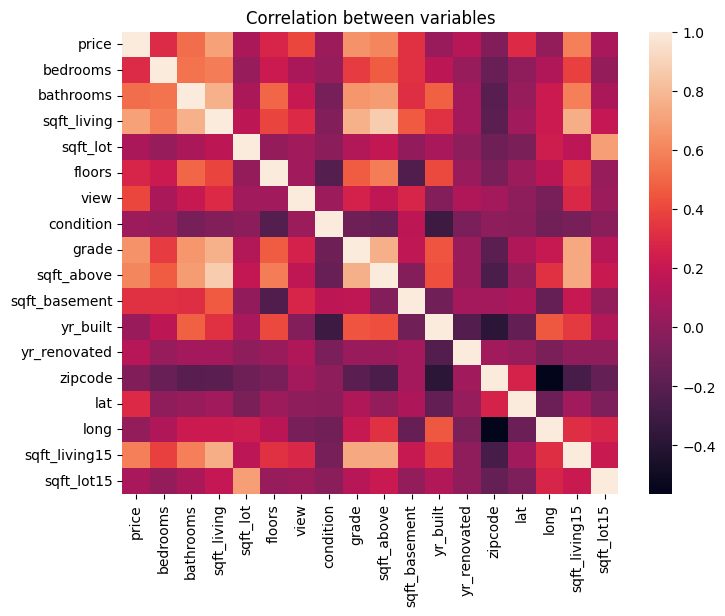

In [16]:
# Plot correlation matrix

# Set window size
fig,ax = plt.subplots(figsize=(8, 6))

# Plot heatmap
ax = sns.heatmap(correlation_house, annot=False, cmap='rocket', vmax=1)

# Add title
plt.title('Correlation between variables')

In [17]:
# Sort variables correlation with price
price_correlation = abs(correlation_house['price']).sort_values(ascending=False)[1:]

In [18]:
# Show positive correlation above 0.5
price_correlation[price_correlation>0.5]

sqft_living      0.702199
grade            0.651100
sqft_above       0.607763
sqft_living15    0.583287
bathrooms        0.521193
Name: price, dtype: float64

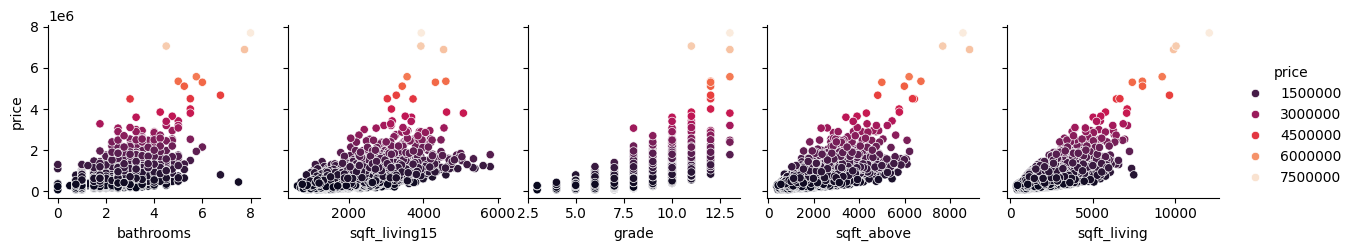

In [19]:
# Seaborn plot for pairwise relationship
# Set window size
sns.pairplot(house_df, x_vars=set(price_correlation[price_correlation>0.5].index), # Select variables
             y_vars='price',hue='price', palette = "rocket", height = 2.5)


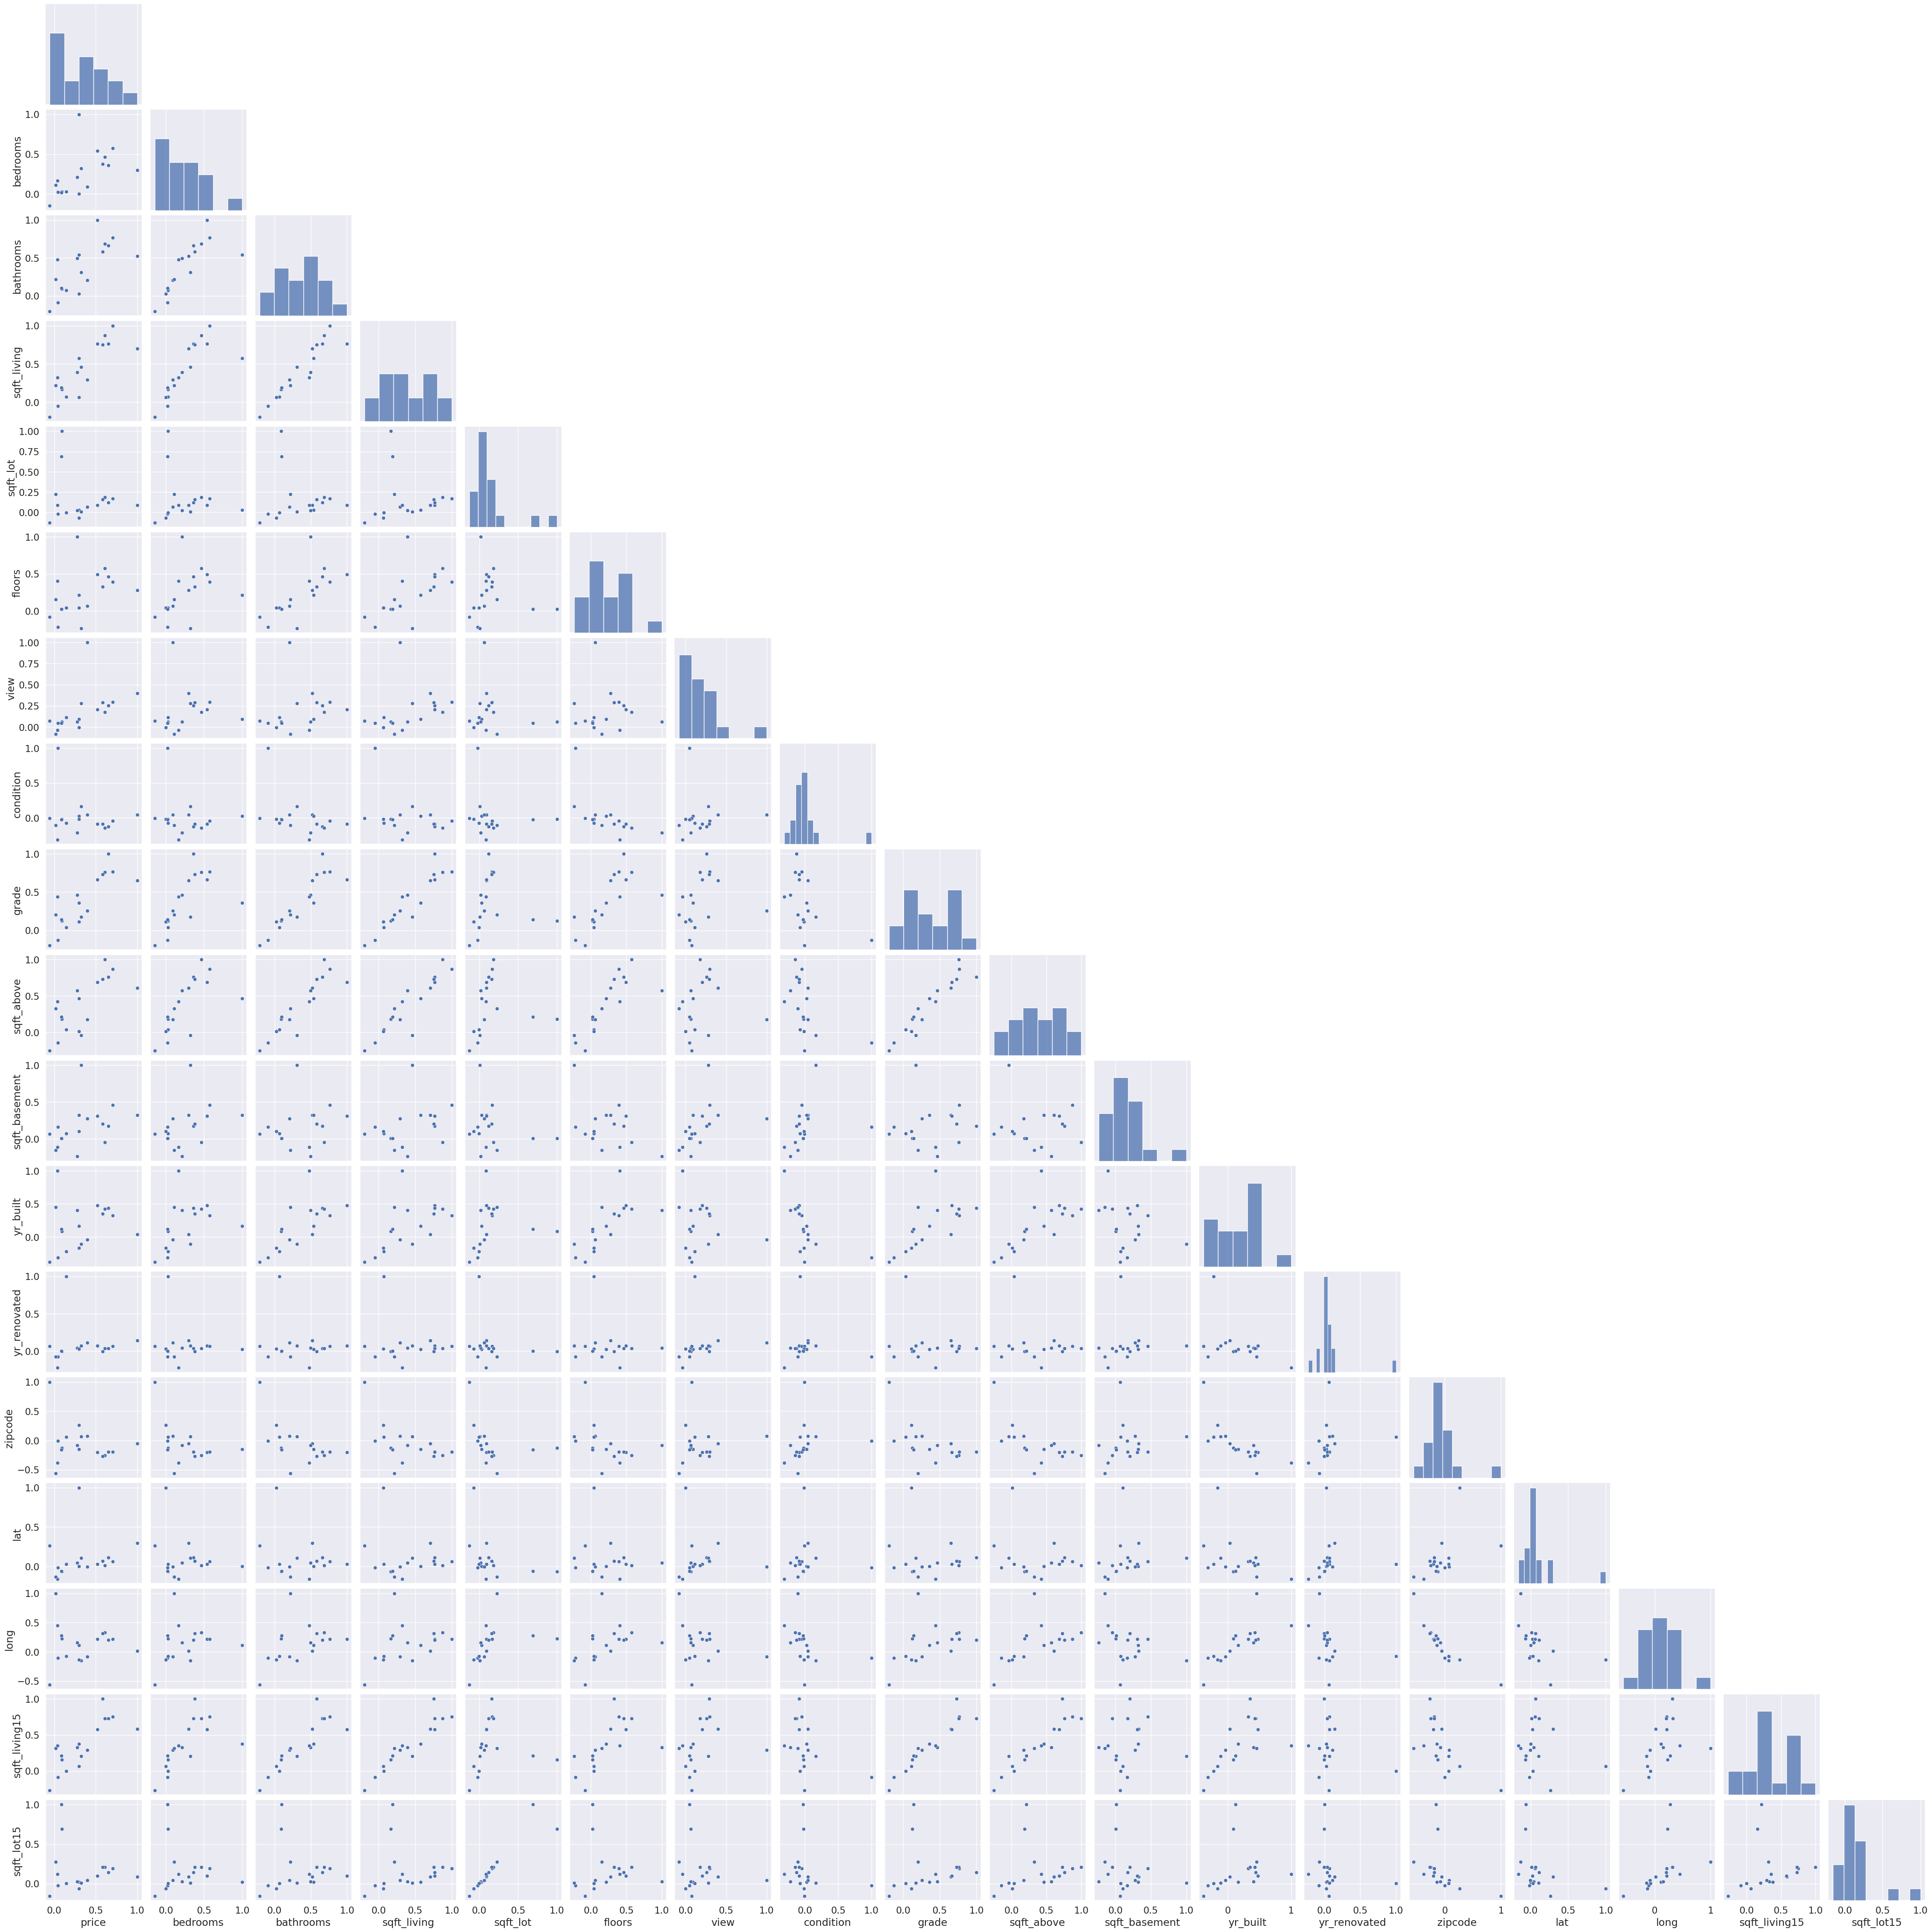

In [192]:
# Seaborn plot for pairwise relationship
sns.set(font_scale=1.4)
sns.pairplot(correlation_house, palette = "viridis_r", height = 2.5, corner=True)

What is the correlation between the price and the number of bedrooms?

In [21]:
# Correlation between price and number of bedrooms
correlation_house['price']['bedrooms']

0.299207216169182

Is there any difference in the correlation when considering only houses with a total area sqft_living greater than 2000 square feet?

In [22]:
# Select houses sqft above 2000
house_2000_df = house_df[house_df['sqft_living']>2000]

In [23]:
# Correlation table for sub sample
correlation_house_2000 = house_2000_df.select_dtypes(exclude='object').corr()

In [24]:
# Correlation between price and number of bedrooms
correlation_house_2000['price']['bedrooms']

0.11912115548964207

The correlation between the variables price and bedrooms is weak, 0.30. If we consider houses above 2000 sqft this correlation is weaker.

2. Is there any correlation between the price and the total area of the house sqft_living, considering only houses with at least two bathrooms?

In [25]:
# Select houses bathrooms >= 2
house_2_bath_df = house_df[house_df['bathrooms']>=2]

In [26]:
# Correlation table for sub sample
correlation_house_2_bath = house_2_bath_df.select_dtypes(exclude='object').corr()

In [27]:
# Correlation between price and number of bathrooms
correlation_house_2_bath['price']['bathrooms']

0.5321077688800735

In [28]:
# Correlation between price and number of bedrooms
correlation_house['price']['bathrooms']

0.5211927985047549

Positive relation between price and number of bathrooms

3. How does the number of bathrooms influence the correlation between the total area of the house sqft_living and the price?

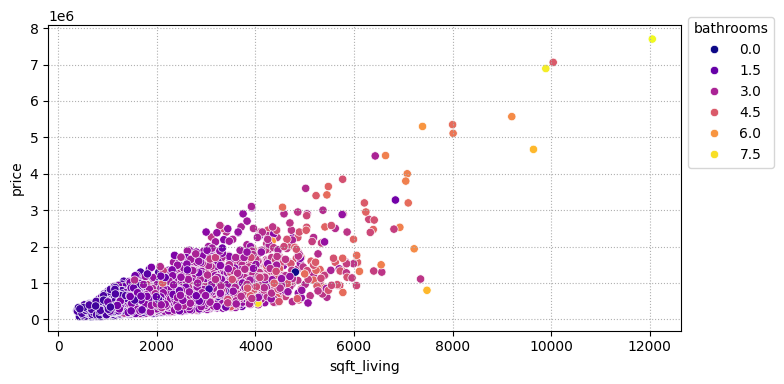

In [29]:
# Plot scatter graph
# Set window size
fig,ax = plt.subplots(figsize=(8, 4))

# Plot
ax = sns.scatterplot(data=house_df, x='sqft_living', y='price', hue='bathrooms', palette='plasma')

# Set title
plt.xlabel('sqft_living')
plt.ylabel('price')

# Add legend
plt.legend(title='bathrooms', loc='upper left', bbox_to_anchor=(1.0,1.05))
# Add gridlines
plt.grid(True, linestyle=':')

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig.tight_layout()

# Show graph
plt.show()



4. What is the relationship between the house condition and the price, considering only houses with a total area sqft_living greater than 3000 square feet?

In [30]:
# Select houses sqft above 3000
house_3000_df = house_df[house_df['sqft_living']>3000]

In [31]:
# Correlation table for sub sample
correlation_house_3000 = house_3000_df.corr(numeric_only=True)

In [32]:
# Correlation between price and house condition
correlation_house_3000['price']['condition']

0.10527844723732628

5. Is there any correlation between the geographic location (latitude and longitude) and the price for houses with at least three bedrooms?

In [33]:
# Select houses bedrooms >= 3
house_3_beds_df = house_df[house_df['bedrooms']>=3]

In [34]:
# Correlation table for sub sample
correlation_house_3_beds = house_3_beds_df.corr(numeric_only=True)

In [35]:
# Correlation between price and latitude
correlation_house_3_beds['price']['lat']

0.31255514248432065

In [36]:
# Correlation between price and longitude
correlation_house_3_beds['price']['long']

-0.007275306992919624

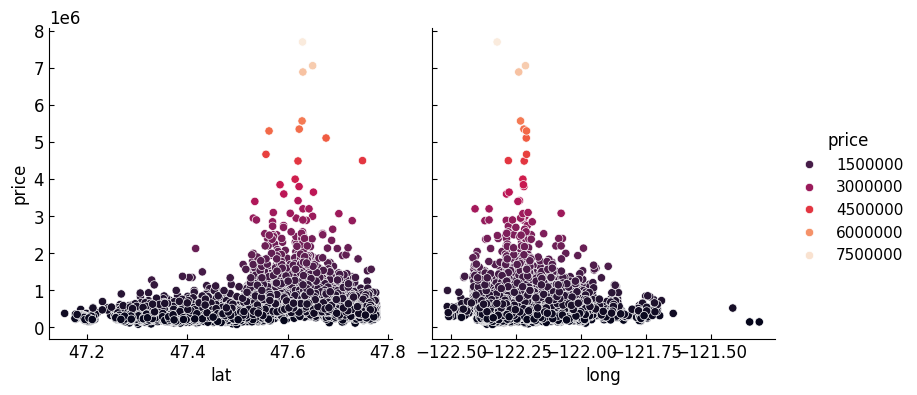

In [37]:
# Seaborn plot for pairwise relationship
# Set window size
sns.pairplot(house_3_beds_df, x_vars=['lat','long'], # select variables
             y_vars='price',hue='price', palette = "rocket", height = 4)

There is no evidence in these graphs of a strong relation among price, latidude and longitude.

In [38]:
print("There is neutral relationship between price and geographic location.\n lat: %.3f,\t long: %.3f\n"%(correlation_house_3_beds['price']['lat'],correlation_house_3_beds['price']['long']))

There is neutral relationship between price and geographic location.
 lat: 0.313,	 long: -0.007



6. Calculate the correlation between a categorical variable (waterfront) and a numerical variable (price) using ANOVA.

In [39]:
# set level of significance
alpha = 0.05

In [40]:
# Create groups
house_df['waterfront'].unique()

array(['n', 'y'], dtype=object)

In [41]:
# Select price data for houses with and without waterfront
house_with_waterfront = house_df[house_df['waterfront']=='y']['price']
house_without_waterfront = house_df[house_df['waterfront']=='n']['price']

In [42]:
# Calculate one-way ANOVA
anova_stat, p_value = stat.f_oneway(house_with_waterfront,house_without_waterfront)

H0: House price = with or without waterfront.

H1: House price <> with or without waterfront.

In [43]:
# Print message
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

Reject H0. P-value < alpha
 P-value = 0.00



The price changes if the house is in front of water

# Car

Considering the car_price.csv dataset, answer the questions:


## Load data

In [44]:
# Read the dataset into a pandas dataframe
car_df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/car_price.csv')

In [45]:
# Check dataframe
car_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990,1680,1505,5,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995,1695,1555,5,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585,1595,1550,5,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995,1745,1510,5,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735,1830,1795,7,55.0


## Data exploration

In [46]:
# dataset size
car_df.shape

(1874, 20)

In [47]:
# Check data type of columns
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   int64  
 16  Width 

In [48]:
# Checking for missing values
car_df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [49]:
# Summary statistics of numerical columns
car_df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [50]:
# Summary statistics of categorical columns
car_df.describe(include=['object'])

,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
count,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874
unique,32,955,7,2,75,16,4,3,104,309,264,3
top,Maruti Suzuki,X1 sDrive20d xLine,Diesel,Manual,Mumbai,White,First,Individual,1197 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD
freq,398,15,954,1037,302,727,1504,1816,230,90,90,1319


## Questions

7. Encode and display the correlation matrix for the numerical variables, and provide examples of positive, negative, and neutral correlations.

In [51]:
# Calculate correlation matrix
# Select only numeric information
correlation_car = car_df.corr(numeric_only=True)

In [52]:
# Correlation table
correlation_car

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,-0.147276,0.568875,0.577100,0.092968,-0.024879,0.586109
Year,0.309381,1.000000,-0.291740,0.085178,0.182220,0.126849,-0.000113,0.044859
Kilometer,-0.147276,-0.291740,1.000000,0.037817,0.008479,0.085728,0.111103,0.052447
Length,0.568875,0.085178,0.037817,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,0.008479,0.797228,1.000000,0.326928,0.229056,0.791316
Height,0.092968,0.126849,0.085728,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,-0.024879,-0.000113,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,0.044859,0.052447,0.809812,0.791316,0.408717,0.313928,1.000000


Text(0.5, 1.0, 'Correlation between variables')

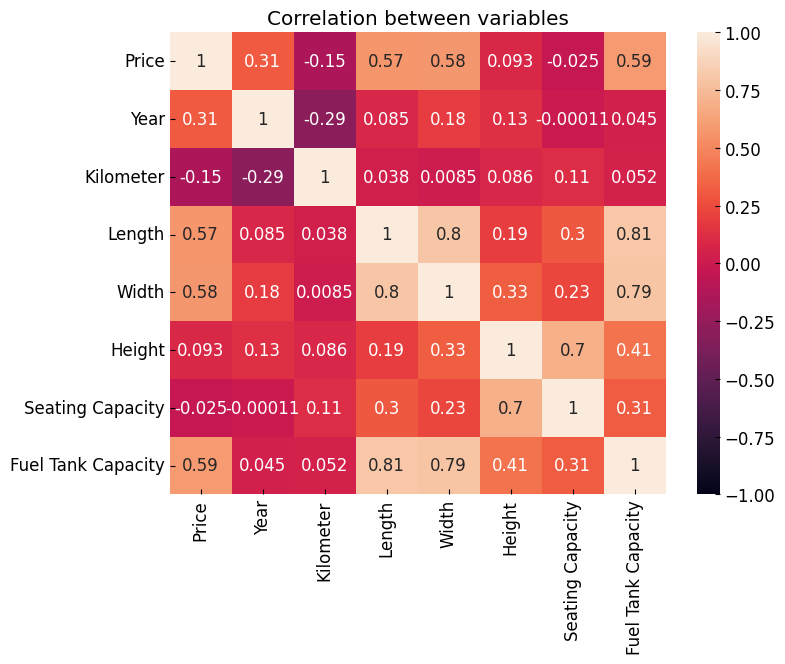

In [53]:
# Plot correlation matrix

# Set window size
fig,ax = plt.subplots(figsize=(8, 6))

# Plot heatmap
ax = sns.heatmap(correlation_car, annot=True, cmap='rocket', vmin=-1, vmax=1)

# Add titles
plt.title('Correlation between variables')

In [54]:
# Sort price correlation
car_price_correlation = abs(correlation_car['Price']).sort_values(ascending=False)[1:]

In [58]:
# Select positive relation with price
car_price_correlation[car_price_correlation>0.5]

Fuel Tank Capacity    0.586109
Width                 0.577100
Length                0.568875
Name: Price, dtype: float64

In [59]:
# Select neutral relation with price
car_price_correlation[(car_price_correlation<=0.5)&(car_price_correlation>-0.5)]

Year                0.309381
Kilometer           0.147276
Height              0.092968
Seating Capacity    0.024879
Name: Price, dtype: float64

In [60]:
# Select negative relation with price
car_price_correlation[car_price_correlation<-0.5]

Series([], Name: Price, dtype: float64)

8. Encode and display scatter plots for each of the numerical variables in relation to the target variable Price.

In [171]:
def price_scatterplot(df,yvar,hue=None):
  # Get columns of dataset
  columns = list(correlation_car['Price'].sort_values(ascending=False).index)
  # remove target from list
  columns.remove(yvar)

  # plot scatter for each item in list
  for column in columns:
    # Create scatter plot
    # Set window size
    fig,ax = plt.subplots(figsize=(8, 5))
    # Plot
    ax = sns.scatterplot(data=df, x=column, y=yvar, s=100, hue=hue, palette='rocket', edgecolor="k", linewidth=1)

    # Add axis labels
    plt.xlabel(column)
    plt.ylabel(yvar)

    # Add legend
    plt.legend(title=yvar+' lanes', loc='upper left', bbox_to_anchor=(1.0,1.05))

    # Add gridlines
    plt.grid(True, linestyle=':')

    # Set style
    plt.style.use('default')
    fig.patch.set_facecolor('xkcd:white')
    plt.rcParams['font.size'] = 12
    plt.rcParams['legend.fontsize'] = 11
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    fig.tight_layout()

    # Show graph
    plt.show()


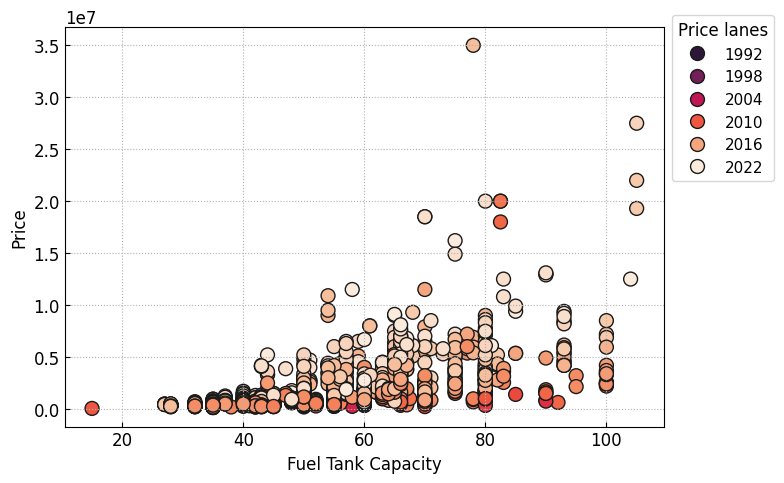

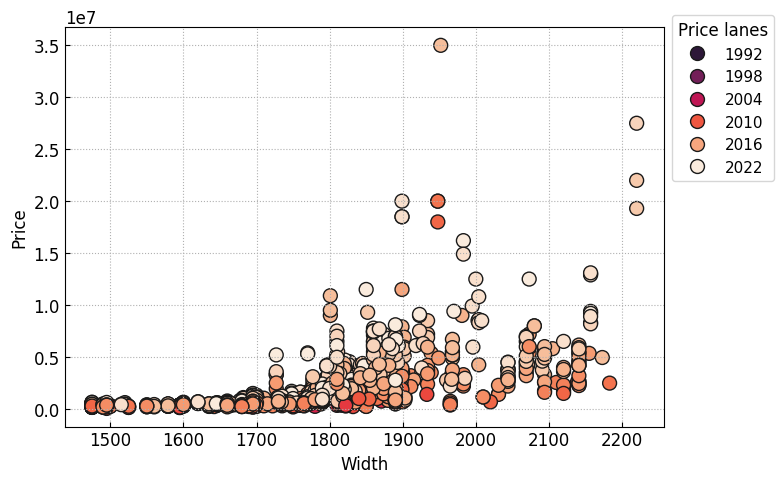

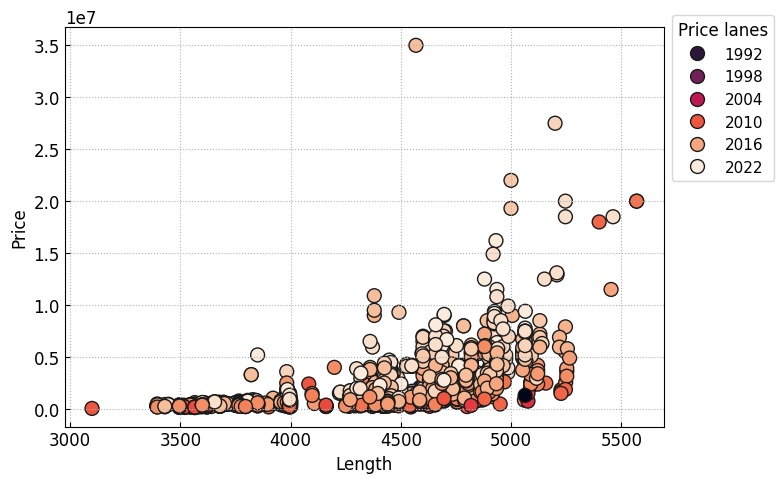

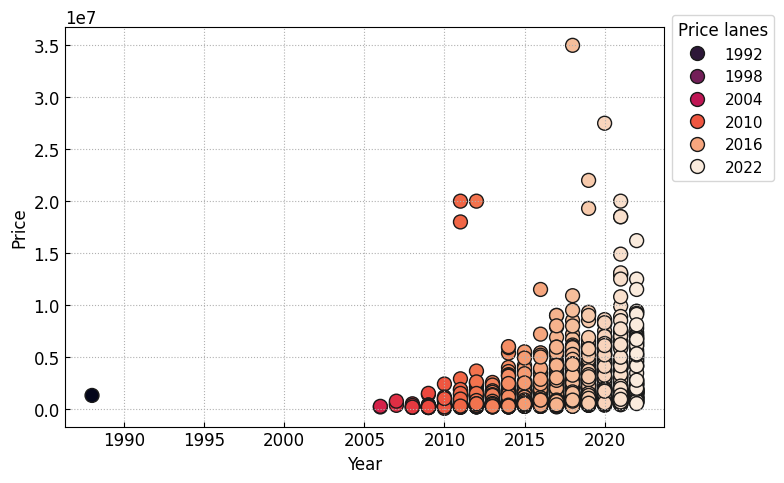

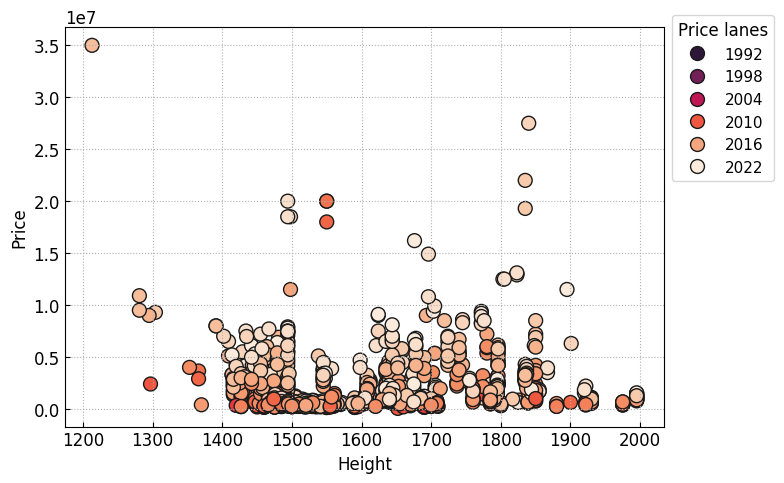

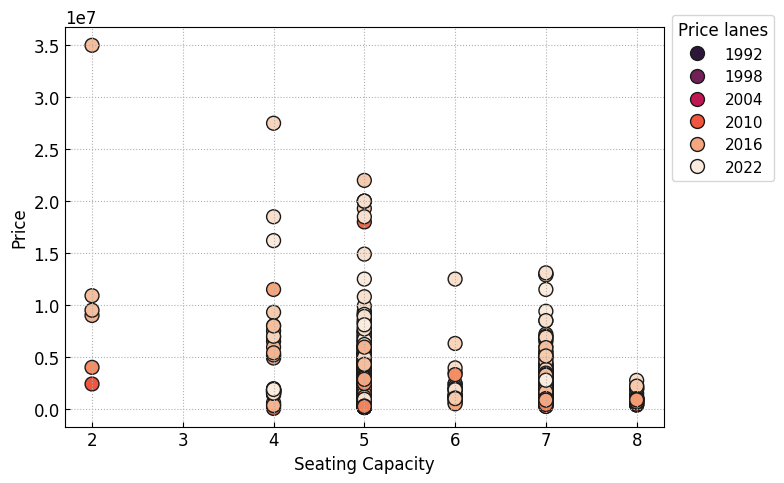

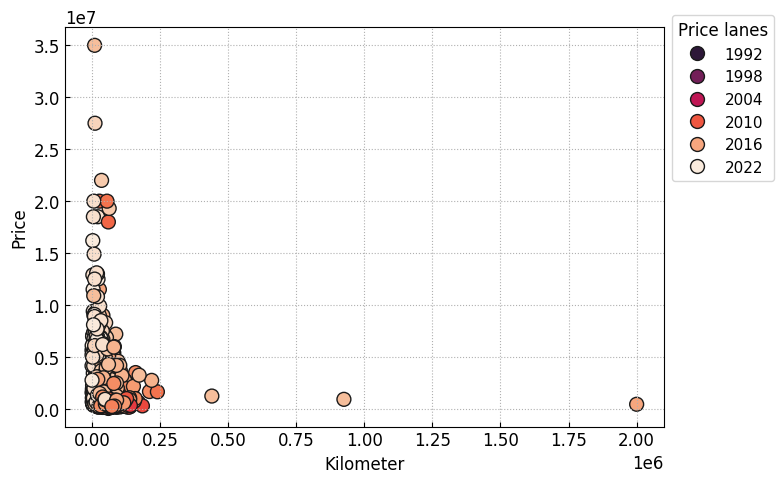

In [172]:
# Call function to diplay scatterplots
price_scatterplot(car_df,'Price', hue='Year')

9. Create a Simple Linear Regression model, display the Regression Table, and show the plot of the Estimated Line

In [173]:
def regression_model(x_var,y_var):
  # Define independent variables (features) and dependent variable (target)
  X = car_df[x_var]  # feature
  y = car_df[y_var]  # target

  # Add constant term to independent variables
  X = sm.add_constant(X)

  # Fit the multivariate regression model
  model = sm.OLS(y, X).fit()

  # Predict
  y_predict = model.predict(X)

  return model, y_predict

In [174]:
# Define independent variables (features) and dependent variable (target)
x_var = 'Fuel Tank Capacity'
y_var = 'Price'
# Target
y_real = car_df[y_var]
# Call function
linear_model, y_predict = regression_model(x_var,y_var)

In [175]:
# Display regression summary
print(linear_model.summary(alpha=alpha))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Thu, 16 May 2024   Prob (F-statistic):          2.59e-173
Time:                        00:09:39   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

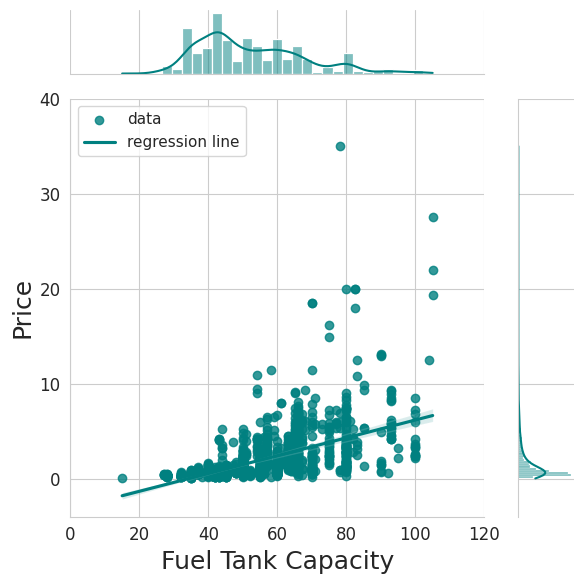

In [176]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set_style("whitegrid")

# Draw multiple bivariate plots with univariate marginal distributions
sns_plot = sns.jointplot(x = car_df[x_var], y = y_real/1e6, kind='reg', color="teal")

# Add and set x- and y- ticks
sns_plot.ax_joint.set_xticks([0,20,40,60,80,100,120])
sns_plot.ax_joint.set_yticks([0,10,20,30,40])

# Add labels
sns_plot.set_axis_labels(x_var, y_var, fontsize=18)
# Add legend
plt.legend(labels=["data","regression line"])

sns_plot.figure.tight_layout()

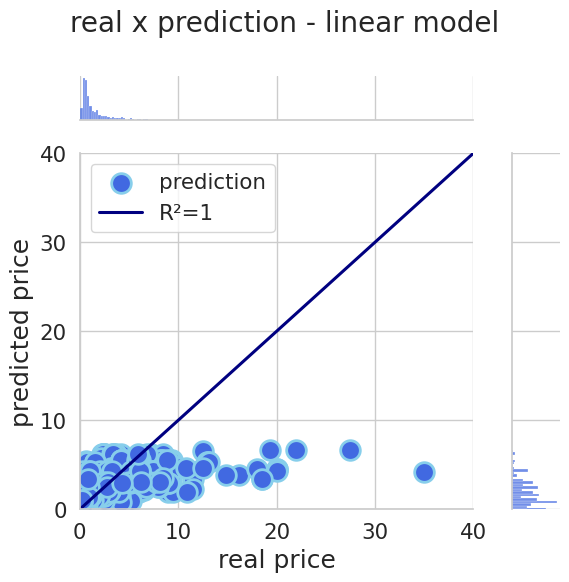

In [184]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Draw multiple bivariate plots with univariate marginal distributions
sns_plot = sns.jointplot(x = y_real/1e6, y = y_predict/1e6, kind='scatter', xlim=[0,40], ylim=[0,40] , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)

# Add reference line for a "perfect" model R² = 1
sns_plot.ax_joint.plot([0,40], [0,40], color="navy", linewidth = 2.2)

# Add and set x- and y- ticks
sns_plot.ax_joint.set_xticks([0,10,20,30,40])
sns_plot.ax_joint.set_yticks([0,10,20,30,40])

# Add labels
sns_plot.set_axis_labels('real price', 'predicted price', fontsize=18)

# Add title
sns_plot.fig.suptitle("real x prediction - linear model")

# Add legend
plt.legend(labels=["prediction","R²=1"])

sns_plot.figure.tight_layout()

10. Encode and display the plot of the residuals of the Simple Regression model.

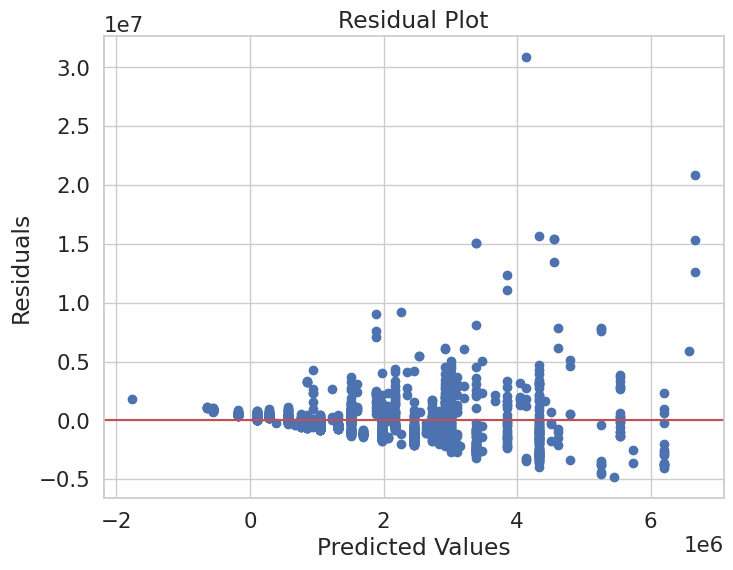

In [185]:
# Get residuals
residuals = linear_model.resid

# Set window size
plt.figure(figsize=(8, 6))

# Plot residuals
plt.scatter(y_predict, residuals)

# Add reference line for residuals = 0
plt.axhline(y=0, color='r', linestyle='-')

# Add labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()

11. Create a Multivariate Regression model, display the Regression Table, and show the plot of the residuals of the model.

In [186]:
# Define independent variables (features) and dependent variable (target)
x_var = ['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
y_var = 'Price'
multivariate_model,y_multi_predict = regression_model(x_var,y_var)

In [187]:
# Display regression summary
print(multivariate_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Thu, 16 May 2024   Prob (F-statistic):          1.49e-278
Time:                        00:12:23   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

In [188]:
# Define independent variables (features) and dependent variable (target)
x_var = ['Year', 'Kilometer', 'Length', 'Width', 'Seating Capacity', 'Fuel Tank Capacity']
y_var = 'Price'
multivariate_model,y_multi_predict = regression_model(x_var,y_var)

In [189]:
# Display regression summary
print(multivariate_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     315.8
Date:                Thu, 16 May 2024   Prob (F-statistic):          1.01e-279
Time:                        00:12:26   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1867   BIC:                         5.916e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.646e+08   2.73

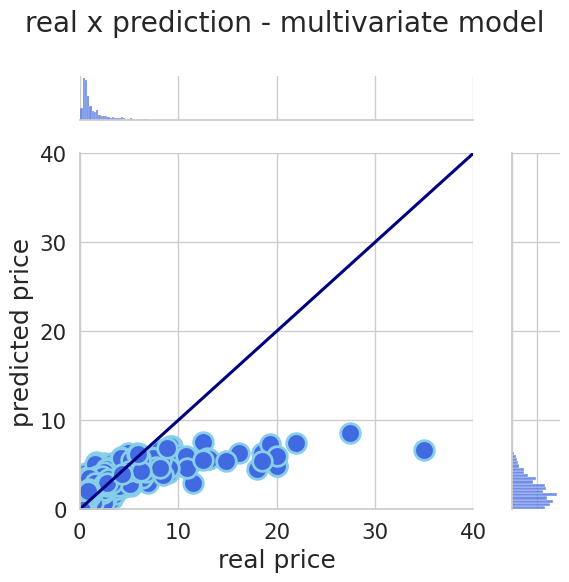

In [190]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.set_style("whitegrid")

# Draw multiple bivariate plots with univariate marginal distributions
sns_plot = sns.jointplot(x = y_real/1e6, y = y_multi_predict/1e6, kind='scatter', xlim=[0,40], ylim=[0,40] , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)

# Add reference line for a "perfect" model R²=1
sns_plot.ax_joint.plot([0,40], [0,40], color="navy", linewidth = 2.2)

# Add and set x- and y- ticks
sns_plot.ax_joint.set_xticks([0,10,20,30,40])
sns_plot.ax_joint.set_yticks([0,10,20,30,40])

# Add title
sns_plot.fig.suptitle("real x prediction - multivariate model")

# Add labels
sns_plot.set_axis_labels('real price', 'predicted price', fontsize=18)

# also possible to manipulate the histogram plots this way, e.g.
sns_plot.ax_marg_y.grid('on') # with ugly consequences...

sns_plot.figure.tight_layout()

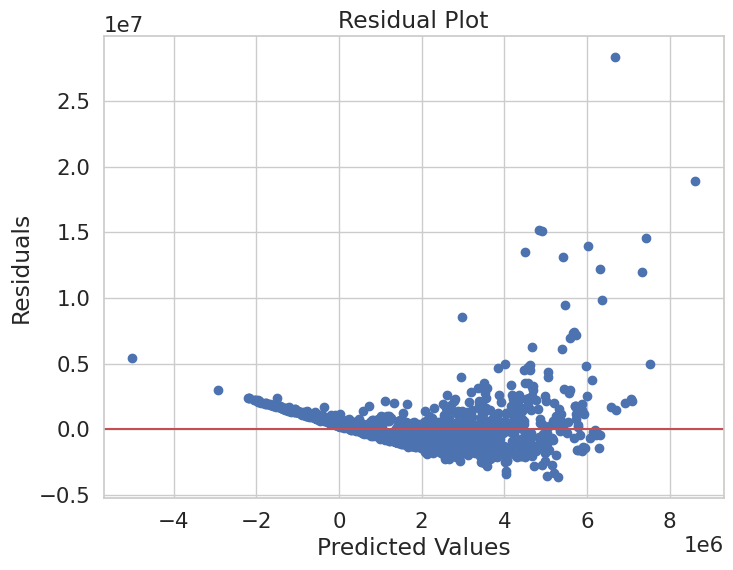

In [191]:
# Get residuals
residuals = multivariate_model.resid

# Set window size
plt.figure(figsize=(8, 6))

# Plot residuals
plt.scatter(y_multi_predict, residuals)

# Add reference line for residuals = 0
plt.axhline(y=0, color='r', linestyle='-')

# Add title, x- and y- labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()